In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [12]:
import pandas as pd

# قراءة الملف (غيّر المسار حسب مكان الملف)
df = pd.read_csv("/kaggle/input/wind-data/Wind.csv")

# عرض أول صفوف للتأكد
df.head()


,Date,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,City
0,1/1/2020,12:00:00 AM,21.7,68,12.7,8.50,14.05,243,250,12.6,0.4775,Helsinki
1,1/1/2020,1:00:00 AM,22.5,69,13.7,8.10,13.38,243,250,12.2,0.4725,Helsinki
2,1/1/2020,2:00:00 AM,23.6,70,15.3,8.10,13.38,246,253,11.5,0.4675,Helsinki
3,1/1/2020,3:00:00 AM,25.8,71,17.8,7.97,13.15,250,257,11.5,0.4625,Helsinki
4,1/1/2020,4:00:00 AM,27.1,73,19.6,7.82,12.97,254,261,11.3,0.4575,Helsinki


In [13]:
# معلومات عامة
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())


Shape: (8784, 12)

Data Types:
 Date                    object
Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Power                  float64
City                    object
dtype: object

Missing Values:
 Date                   0
Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
City                   1
dtype: int64


In [14]:
# دمج التاريخ والوقت في عمود واحد وتحويله لـ datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# استخراج خصائص زمنية
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

# حذف الأعمدة الأصلية
df = df.drop(columns=['Date', 'Time', 'Datetime'])

df.head()


/tmp/ipykernel_37/2735489820.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,City,Year,Month,Day,Hour,DayOfWeek
0,21.7,68,12.7,8.50,14.05,243,250,12.6,0.4775,Helsinki,2020,1,1,0,2
1,22.5,69,13.7,8.10,13.38,243,250,12.2,0.4725,Helsinki,2020,1,1,1,2
2,23.6,70,15.3,8.10,13.38,246,253,11.5,0.4675,Helsinki,2020,1,1,2,2
3,25.8,71,17.8,7.97,13.15,250,257,11.5,0.4625,Helsinki,2020,1,1,3,2
4,27.1,73,19.6,7.82,12.97,254,261,11.3,0.4575,Helsinki,2020,1,1,4,2


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


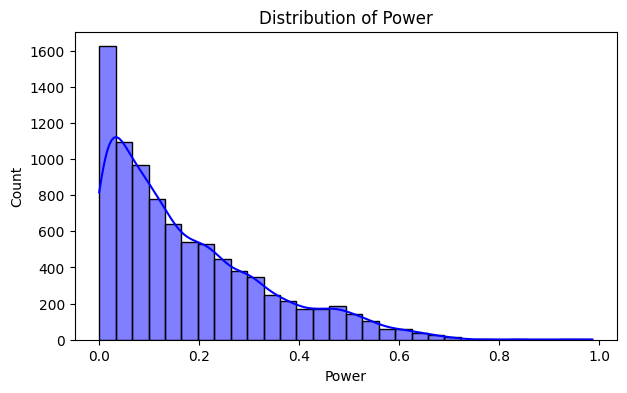

In [15]:
# توزيع الهدف Power
plt.figure(figsize=(7,4))
sns.histplot(df['Power'], kde=True, bins=30, color='blue')
plt.title('Distribution of Power')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


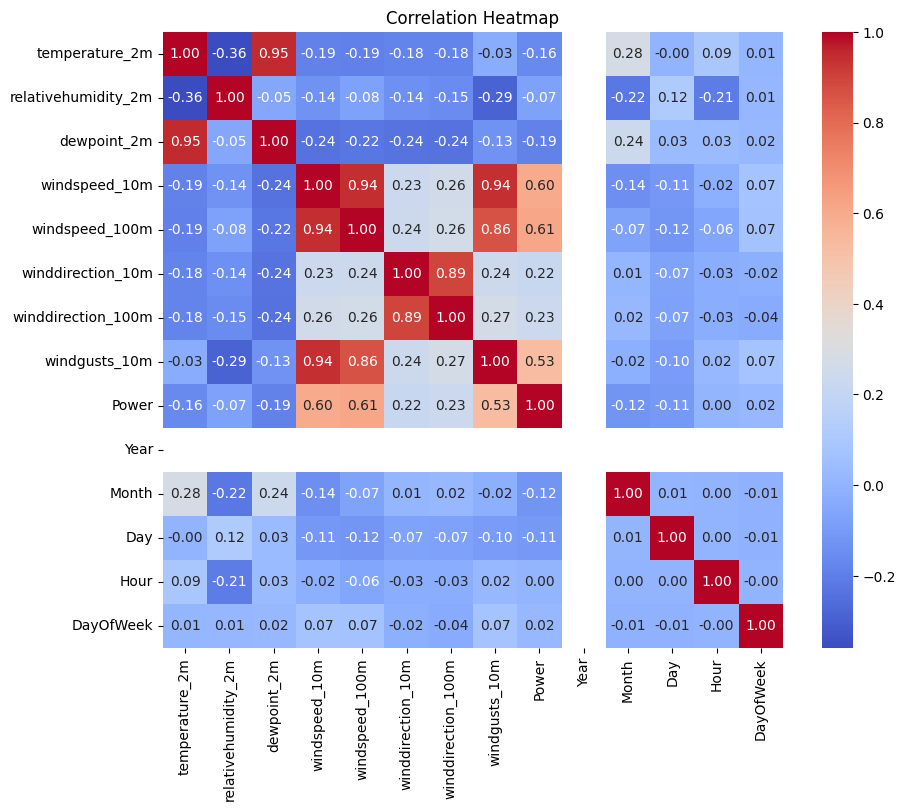

In [16]:
# مصفوفة الارتباط
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

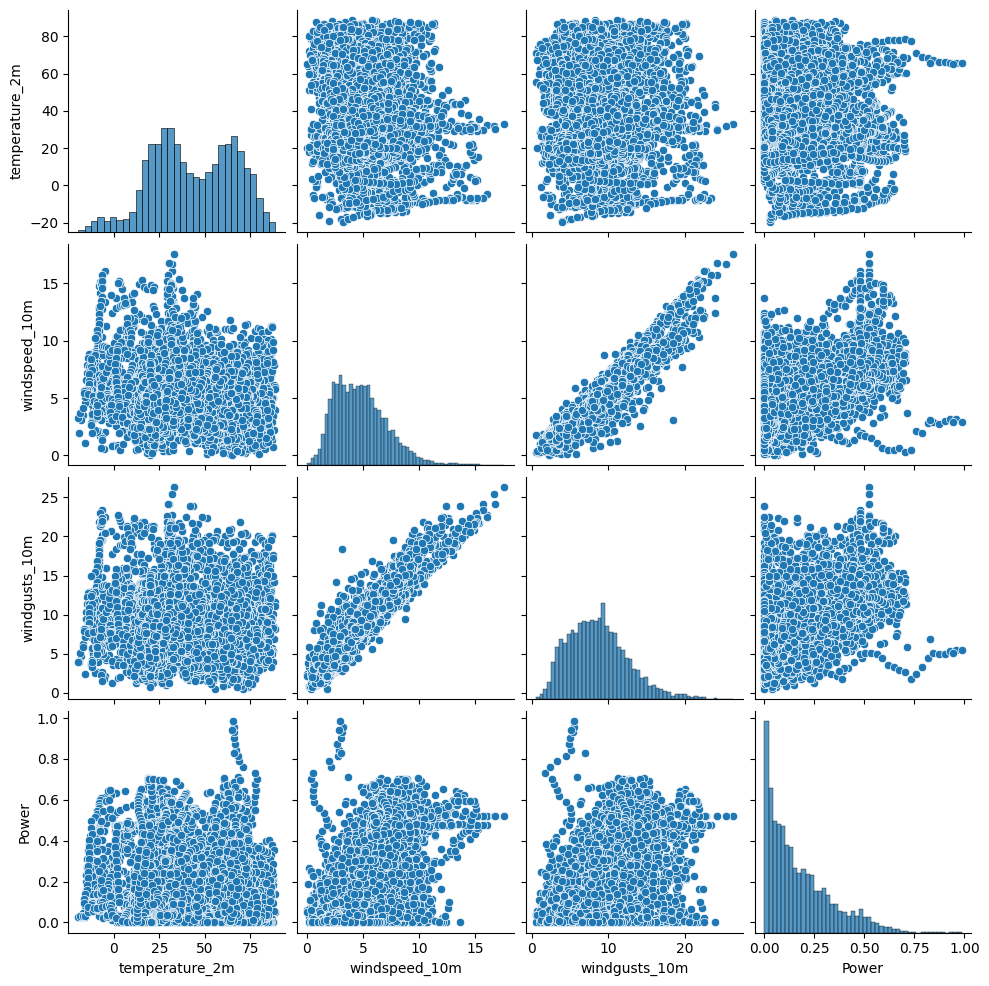

In [17]:
# العلاقة بين Power وبعض الخصائص
sns.pairplot(df[['temperature_2m', 'windspeed_10m', 'windgusts_10m', 'Power']])
plt.show()

In [18]:
target = 'Power'
X = df.drop(columns=[target, 'City'])
y = df[target]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (7027, 13)
Test shape: (1757, 13)


In [20]:
from sklearn.preprocessing import StandardScaler

# إنشاء الكائن المسؤول عن التطبيع
scaler = StandardScaler()

# تطبيق التطبيع على البيانات
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling completed successfully.")


✅ Scaling completed successfully.


In [21]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [22]:
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


RMSE: 0.0802
MAE: 0.0572
R²: 0.7499


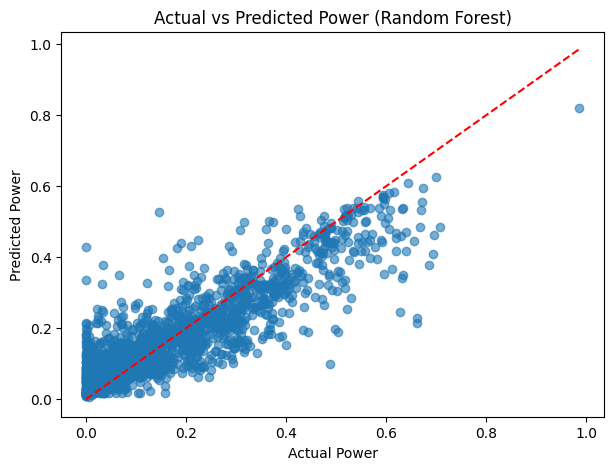

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("Actual vs Predicted Power (Random Forest)")
plt.show()


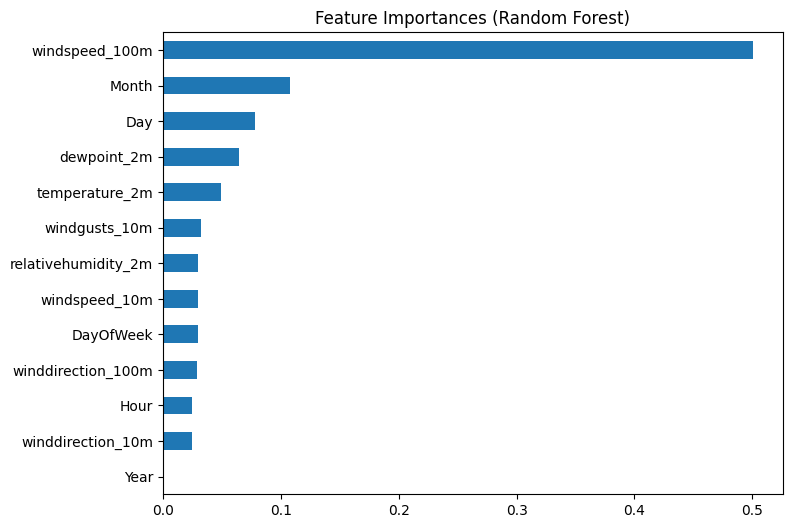

In [24]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances (Random Forest)')
plt.show()
